#### 散列表/哈希表 hash table

* 时间复杂度：O(1)

把Key通过一个固定的算法函数，既所谓的哈希函数转换成一个整型数字，然后就将该数字对数组长度进行取余，取余结果就当作数组的下标，将value存储在以该数字为下标的数组空间里，而当使用哈希表进行查询的时候，就是再次使用哈希函数将key转换为对应的数组下标，并定位到该空间获取value，如此一来，就可以充分利用到数组的定位性能进行数据定位。

#### 哈希冲突

##### 开放定址法  

  * 删除的数据需要标记为deleted，如果直接置成空，在查询数据时，查到空的地址时，会认为key不存在，如果置成deleted，在碰到deleted的情况时，继续寻下一个地址。
  * 根据5、6 的优缺点，当数据量比较小、装载因子小的时候，适合采用开放寻址法。这也是 Java 中的ThreadLocalMap使用开放寻址法解决散列冲突的原因。

1. 线性探查法 
    1. Hi=（H（key）+di）% m   i=1，2，…，n
    2. di=1，2，3，…，m-1
2. 二次探测查法 / 线性补偿探测法
    1. Hi=（H（key）+di）% m   i=1，2，…，n
    2. di=12，-12，22，-22，…，k2，-k2    ( k<=m/2 )
3. 随机探测
    1. di=伪随机数序列。
    2. 应建立一个伪随机数发生器，（如i=(i+p) % m），并给定一个随机数做起点
4. 再hash法
    1. Hi=RH1（key）  i=1，2，…，k
    2. 当哈希地址Hi=RH1（key）发生冲突时，再计算Hi=RH2（key）……，直到冲突不再产生。这种方法不易产生聚集，但增加了计算时间。
5. 优点：开放寻址法不像链表法，需要拉很多链表。散列表中的数据都存储在数组中，可以有效地利用 CPU 缓存加快查询速度。而且，这种方法实现的散列表，序列化起来比较简单。链表法包含指针，序列化起来就没那么容易。
6. 缺点：用开放寻址法解决冲突的散列表，删除数据的时候比较麻烦，需要特殊标记已经删除掉的数据。而且，在开放寻址法中，所有的数据都存储在一个数组中，比起链表法来说，冲突的代价更高。所以，使用开放寻址法解决冲突的散列表，装载因子的上限不能太大。这也导致这种方法比链表法更浪费内存空间

##### 拉链法 Java 中的 LinkedHashMap

* 基于链表的散列冲突处理方法比较适合存储大对象、大数据量的散列表，而且，比起开放寻址法，它更加灵活，支持更多的优化策略，比如用红黑树代替链表。
* 链表法对内存的利用率比开放寻址法要高。因为链表结点可以在需要的时候再创建，并不需要像开放寻址法那样事先申请好
* 链表法比起开放寻址法，对大装载因子的容忍度更高。开放寻址法只能适用装载因子小于 1 的情况。接近 1 时，就可能会有大量的散列冲突，导致大量的探测、再散列等，性能会下降很多。但是对于链表法来说，只要散列函数的值随机均匀，即便装载因子变成 10，也就是链表的长度变长了而已，虽然查找效率有所下降，但是比起顺序查找还是快很多。

1. 将所有关键字为同义词的结点链接在同一个单链表中。若选定的散列表长度为m，则可将散列表定义为一个由m个头指针组成的指针数 组T[0..m-1]。凡是散列地址为i的结点，均插入到以T[i]为头指针的单链表中。T中各分量的初值均应为空指针。在拉链法中，装填因子(load factor)α可以大于 1，但一般均取α≤1。 
2. 散列表的装载因子=填入表中的元素个数/散列表的长度
3. 链表法是一种更加常用的散列冲突解决办法，相比开放寻址法，它要简单很多。在散列表中，每个“桶（bucket）”或者“槽（slot）”会对应一条链表，所有散列值相同的元素都放到相同槽位对应的链表中。
4. 当插入的时候，只需要通过散列函数计算出对应的散列槽位，将其插入到对应链表中即可，所以插入的时间复杂度是 O(1)。
5. 查找和删除的时间复杂度跟链表的长度 k 成正比，也就是 O(k)。对于散列比较均匀的散列函数来说，理论上讲，k=n/m，其中 n 表示散列中数据的个数，m 表示散列表中“槽”的个数。

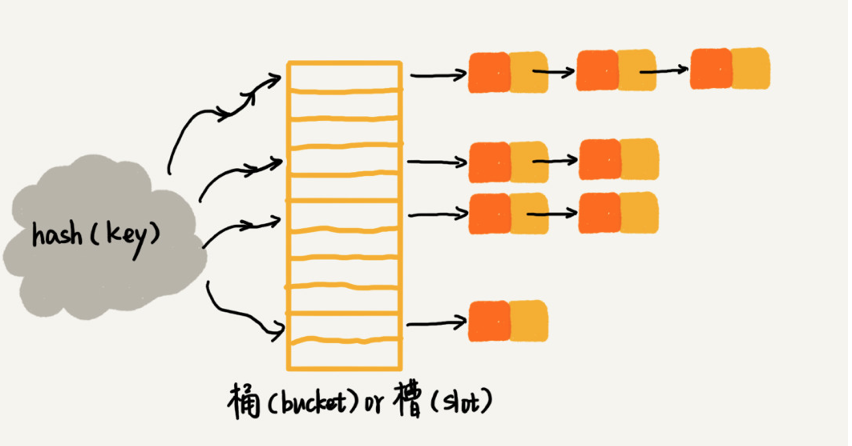

##### 建立公共溢出区
将哈希表分为基本表和溢出表两部分，凡是和基本表发生冲突的元素，一律填入溢出表

#### 设计工业级别的散列表

如何设计一个可以应对各种异常情况的工业级散列表，来避免在散列冲突的情况下，散列表性能的急剧下降，并且能抵抗散列碰撞攻击

在极端情况下，有些恶意的攻击者，还有可能通过精心构造的数据，使得所有的数据经过散列函数之后，都散列到同一个槽里。如果使用的是基于链表的冲突解决方法，那这个时候，散列表就会退化为链表，查询的时间复杂度就从 O(1) 急剧退化为 O(n)。


1. 设计一个合适的散列函数。散列函数生成的值要尽可能随机并且均匀分布
    * 这样才能避免或者最小化散列冲突，而且即便出现冲突，散列到每个槽里的数据也会比较平均，不会出现某个槽内数据特别多的情况。
    * 如何实现 Word 拼写检查功能。这里面的散列函数，可以这样设计：将单词中每个字母的ASCll 码值“进位”相加，然后再跟散列表的大小求余、取模，作为散列值。比如，英文单词 nice，转化出来的散列值就是下面这样：hash("nice")=(("n" - "a") * 26*26*26 + ("i" - "a")*26*26 + ("c" - "a")*26+ ("e"-"a")) / 78978
2. 选择合适的散列冲突解决方法
3. 定义装载因子阈值，并且设计动态扩容策略
    1. 针对数组的扩容，数据搬移操作比较简单。但是，针对散列表的扩容，数据搬移操作要复杂很多。因为散列表的大小变了，数据的存储位置也变了，所以我们需要通过散列函数重新计算每个数据的存储位置。
    2. 为了解决一次性扩容耗时过多的情况，可以将扩容操作穿插在插入操作的过程中，分批完成。
        1. 当装载因子触达阈值之后，只申请新空间，但并不将老的数据搬移到新散列表中。
        2. 当有新数据要插入时，我们将新数据插入新散列表中，并且从老的散列表中拿出一个数据放入到新散列表。
        3. 每次插入一个数据到散列表，都重复上面的过程。经过多次插入操作之后，老的散列表中的数据就一点一点全部搬移到新散列表中了。
        4. 这样没有了集中的一次性数据搬移，插入操作就都变得很快了。
    3. 对于查询操作，为了兼容了新、老散列表中的数据，我们先从新散列表中查找，如果没有找到，再去老的散列表中查找。

redis中的dict.c中的设计思路是用两个hash表来进行进行扩容和转移的工作：当从第一个hash表的loadFactor=1时。
假设要往字典里插入一个元素。
首先新建容量为第一个hash表2倍容量的新表；
同一时候将第一个hash表的一个非空桶中元素所有转移到第二个hash表中。
然后把待插入元素存储到第二个hash表里。
继续往字典里插入第二个元素，又会将第一个hash表的一个非空桶中元素所有转移到第二个hash表中，然后把元素存储到第二个hash表里……直到第一个hash表为空。
这样的策略就把第一个hash表全部元素的转移分摊为多次转移，并且每次转移的期望时间复杂度为O(1)。

Java HashMap
1. 初始大小
    HashMap 默认的初始大小是 16，当然这个默认值是可以设置的，如果事先知道大概的数据量有多大，可以通过修改默认初始大小，减少动态扩容的次数，这样会大大提高 HashMap 的性能。

2. 装载因子和动态扩容
    最大装载因子默认是 0.75，当 HashMap 中元素个数超过 0.75*capacity（capacity 表示哈希表的容量）的时候，就会启动扩容，每次扩容都会扩容为原来的两倍大小。

3. 哈希冲突解决方法
    HashMap 底层采用链表法来解决冲突。
    即使负载因子和哈希函数设计得再合理，也免不了会出现拉链过长的情况，一旦出现拉链过长，则会严重影响 HashMap 的性能。        于是，在 JDK1.8 版本中，为了对 HashMap 做进一步优化，我们引入了红黑树。而当链表长度太长（默认超过 8）时，链表就转换为红黑树。我们可以利用红黑树快速增删改查的特点，提高 HashMap 的性能。当红黑树结点个数少于 8 个的时候，又会将红黑树转化为链表。因为在数据量较小的情况下，红黑树要维护平衡，比起链表来，性能上的优势并不明显。

4. 哈希函数
int hash(Object key) {
    int h = key.hashCode()；
    return (h ^ (h >>> 16)) & (capicity -1); //capicity表示哈希表的大小
}

Java LinkedHashMap

LinkedHashMap 也是通过哈希表和链表组合在一起实现的。实际上，它不仅支持按照插入顺序遍历数据，还支持按照访问顺序来遍历数据。

LinkedHashMap 本身就是一个 *支持 LRU 缓存淘汰策略* 的缓存系统

LinkedHashMap 是通过双向链表和哈希表这两种数据结构组合实现的。LinkedHashMap 中的“Linked”实际上是指的是双向链表，并非指用链表法解决哈希冲突。

~~~
HashMap<Integer, Integer> m = new LinkedHashMap<>();
m.put(3, 11);
m.put(1, 12);
m.put(5, 23);
m.put(2, 22);

for (Map.Entry e : m.entrySet()) {
  System.out.println(e.getKey());
}
~~~

--------------
顺序打印 3，1，5，2

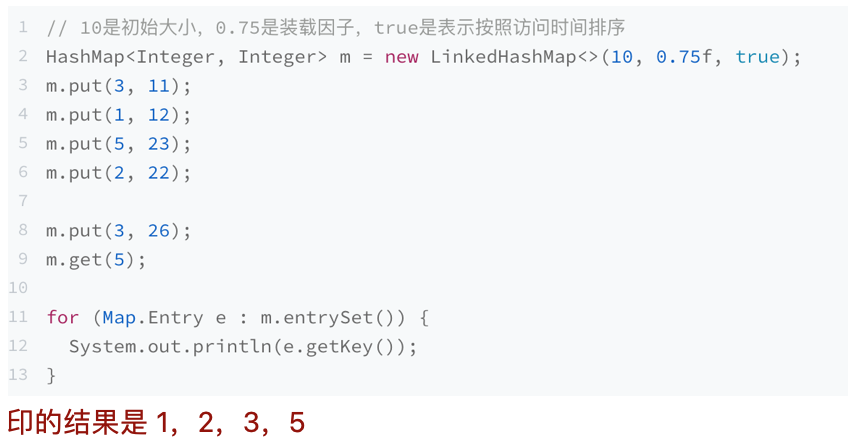

1. 每次调用 put() 函数，往 LinkedHashMap 中添加数据的时候，都会将数据添加到链表的尾部，所以，在前四个操作完成之后，链表中的数据是下面这样：
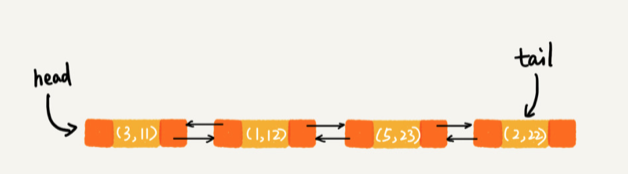

2. 在第 8 行代码中，再次将键值为 3 的数据放入到 LinkedHashMap 的时候，会先查找这个键值是否已经有了，然后，再将已经存在的 (3,11) 删除，并且将新的 (3,26) 放到链表的尾部。所以，这个时候链表中的数据就是下面这样：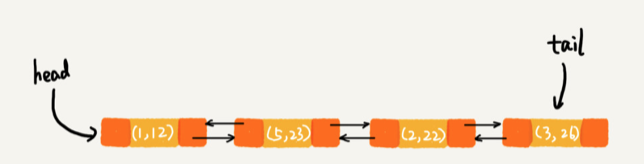

3. 当第 9 行代码访问到 key 为 5 的数据的时候，我们将被访问到的数据移动到链表的尾部。所以，第 9 行代码之后，链表中的数据是下面这样：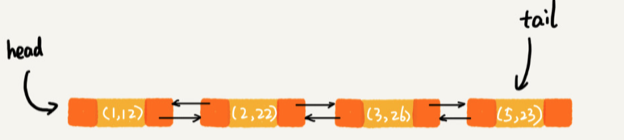

今天讲的几个哈希表和链表结合使用的例子里，我们用的都是双向链表。如果把双向链表改成单链表，还能否正常工作呢？为什么呢？

可以。
增：都需要顺序查询，时间复杂度一致
删：单链表需要保存前继结点(不需要保存前继节点，适用于非尾节点：node.val = node.next.val; node.next = node.next.next)
查：都需要顺序查询，时间复杂度一致

为什么哈希表和链表经常一块使用？

1. 哈希表这种数据结构虽然支持非常高效的数据插入、删除、查找操作，但是哈希表中的数据都是通过哈希函数打乱之后无规律存储的。也就说，它无法支持按照某种顺序快速地遍历数据。如果希望按照顺序遍历哈希表中的数据，那我们需要将哈希表中的数据拷贝到数组中，然后排序，再遍历。
2. 因为哈希表是动态数据结构，不停地有数据的插入、删除，所以每当我们希望按顺序遍历哈希表中的数据的时候，都需要先排序，那效率势必会很低。为了解决这个问题，我们将哈希表和链表（或者跳表）结合在一起使用。

Redis zset
hash table + skipped list+ ？

假设猎聘网有 10 万名猎头，每个猎头都可以通过做任务（比如发布职位）来积累积分，然后通过积分来下载简历。假设你是猎聘网的一名工程师，如何在内存中存储这 10 万个猎头 ID 和积分信息，让它能够支持这样几个操作：
1. 根据猎头的 ID 快速查找、删除、更新这个猎头的积分信息；
2. 查找积分在某个区间的猎头 ID 列表；
3. 查找按照积分从小到大排名在第 x 位到第 y 位之间的猎头 ID 列表。


根据id快速查找: hash table; 排序+区间->redis的zset:跳表
存储数据结构为 猎头id为key的hash table + 以积分升序排序的跳表，存储数据为猎头信息（id、积分等）
1. 查询：hash查询后，定位到具体的节点；删除：查询后删除跳表的节点和hash的key;更新：查询后删除跳表的节点，重新往跳表中加入新积分的节点；
2. 根据跳表查询积分区间，返回区间间的节点id；
3. 顺序查找跳表的原始链表，返回x到y之间的猎头id



有两个字符串数组，每个数组大约有 10 万条字符串，如何快速找出两个数组中相同的字符串？

以第一个字符串数组构建散列表，key 为字符串，value 为出现次数。再遍历第二个字符串数组，以字符串为 key 在散列表中查找，如果 value 大于零，说明存在相同字符串。时间复杂度 O(N)。